In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py

In [3]:
basketdf = pd.read_csv('Data\customer_supermarket.csv', sep='\t', index_col=0, decimal=',')

In [4]:
basketdf.head(10)

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
5,536365,01/12/10 08:26,7.65,17850.0,United Kingdom,22752,SET 7 BABUSHKA NESTING BOXES,2
6,536365,01/12/10 08:26,4.25,17850.0,United Kingdom,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6
7,536366,01/12/10 08:28,1.85,17850.0,United Kingdom,22633,HAND WARMER UNION JACK,6
8,536366,01/12/10 08:28,1.85,17850.0,United Kingdom,22632,HAND WARMER RED POLKA DOT,6
9,536368,01/12/10 08:34,4.25,13047.0,United Kingdom,22960,JAM MAKING SET WITH JARS,6


In [5]:
basketdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  float64
 3   CustomerID       406830 non-null  object 
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 32.4+ MB


In [6]:
basketdf.shape

(471910, 8)

There are object and numeric datas in the dataset. To analyse the customers on amount spend in transactions an amount column is to be added. The basket date is to be converted to date time format, since it is object type 

In [7]:
# convert dates in a suitable format
basketdf['BasketDate'] = pd.to_datetime(basketdf['BasketDate'], dayfirst=True)

In [8]:
# add 'Amount' attribute, useful for some additional features on customer's purchase behaviour
basketdf['Amount'] = basketdf['Sale'] * basketdf['Qta']

In [9]:
basketdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  object        
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
 8   Amount           471910 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.0+ MB


In [10]:
basketdf.shape

(471910, 9)

In [11]:
basketdf.isnull().sum()

BasketID               0
BasketDate             0
Sale                   0
CustomerID         65080
CustomerCountry        0
ProdID                 0
ProdDescr            753
Qta                    0
Amount                 0
dtype: int64

ProdDescr and CustomerId columns have null values. The prodDescr is included in the customerId. Counting all the rows where both attributes are null

In [12]:
basketdf[basketdf['CustomerID'].isnull() & basketdf['ProdDescr'].isnull()].count()

BasketID           753
BasketDate         753
Sale               753
CustomerID           0
CustomerCountry    753
ProdID             753
ProdDescr            0
Qta                753
Amount             753
dtype: int64

In [13]:
basketdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale,471910.0,4.030945,83.769380,-11062.06,1.25,2.08,3.75,38970.0
Qta,471910.0,10.716533,231.355136,-80995.00,1.00,4.00,12.00,80995.0
Amount,471910.0,19.030258,400.925995,-168469.60,3.75,10.08,17.70,168469.6


There are negative values in sale, qta and hence amount. Hence analysing each feature

In [14]:
#BasketID
basketcounts = basketdf['BasketID'].value_counts()
basketcounts.describe()

count    24627.000000
mean        19.162302
std         28.635400
min          1.000000
25%          2.000000
50%         11.000000
75%         24.000000
max        542.000000
Name: BasketID, dtype: float64

The number of distinct baskets is 24627

# Quantity

counting the negative values

In [15]:
# rows with negative qta
qtanegqta = basketdf['Qta'] < 0
basketdf[qtanegqta].count()

BasketID           9752
BasketDate         9752
Sale               9752
CustomerID         8905
CustomerCountry    9752
ProdID             9752
ProdDescr          9305
Qta                9752
Amount             9752
dtype: int64

# Cost

Rows with zero cost

In [16]:
zerocost = basketdf['Sale'] == 0
basketdf[zerocost].count()

BasketID           1279
BasketDate         1279
Sale               1279
CustomerID           40
CustomerCountry    1279
ProdID             1279
ProdDescr           526
Qta                1279
Amount             1279
dtype: int64

There are 1279 rows with zero cost

In [17]:
basketdf[qtanegqta | zerocost].count()

BasketID           10363
BasketDate         10363
Sale               10363
CustomerID          8945
CustomerCountry    10363
ProdID             10363
ProdDescr           9610
Qta                10363
Amount             10363
dtype: int64

These are not relevent for our project so we decided to drop them. 

In [18]:
# drop rows with negative quantity
basketdf.drop(basketdf[qtanegqta].index, inplace=True)
# drop rows with null cost
basketdf.drop(basketdf[zerocost].index, inplace=True)

C:\Users\Manjusha\AppData\Local\Temp\ipykernel_15644\722378982.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  basketdf.drop(basketdf[zerocost].index, inplace=True)


In [19]:
basketdf.shape

(461547, 9)

[]

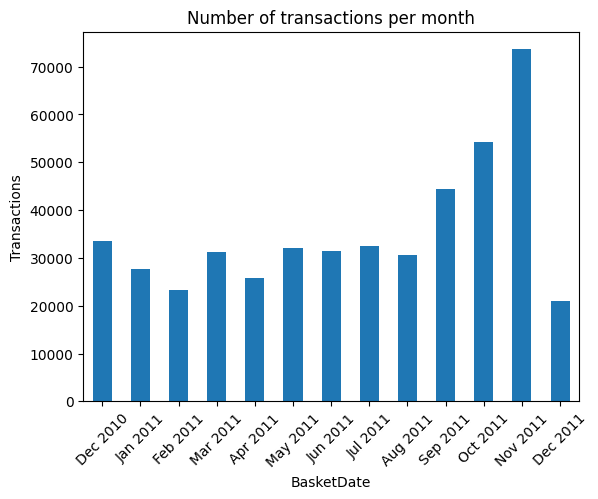

In [20]:
tran = basketdf.groupby(pd.Grouper(key='BasketDate', freq='M'))['BasketID'].count()
tran.index = tran.index.strftime('%b %Y')
tranplt = tran.plot(kind='bar', title='Number of transactions per month', rot=45)

tranplt.set_ylabel('Transactions')
tranplt.plot()

Total number of transations by each customer

count    4338.000000
mean       91.720839
std       228.785054
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: CustomerID, dtype: float64


Text(0, 0.5, 'Transactions')

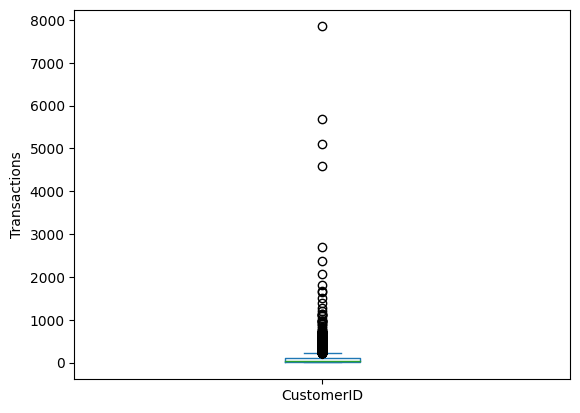

In [21]:
cust_counts = basketdf['CustomerID'].value_counts()
print(cust_counts.describe())
custplot = cust_counts.plot.box()
custplot.set_ylabel("Transactions")

In [22]:
basketdf['CustomerID'].isnull().sum()

63662

Drop transactions with null CustomerID

In [23]:
# drop rows with null customerID
basketdf.dropna(subset=['CustomerID'], inplace=True)

# export cleaned dataset for further analysis
basketdf.to_csv(r'clean_basketdf.csv', index=True, header=True)

Customer Country

<AxesSubplot: xlabel='CustomerCountry'>

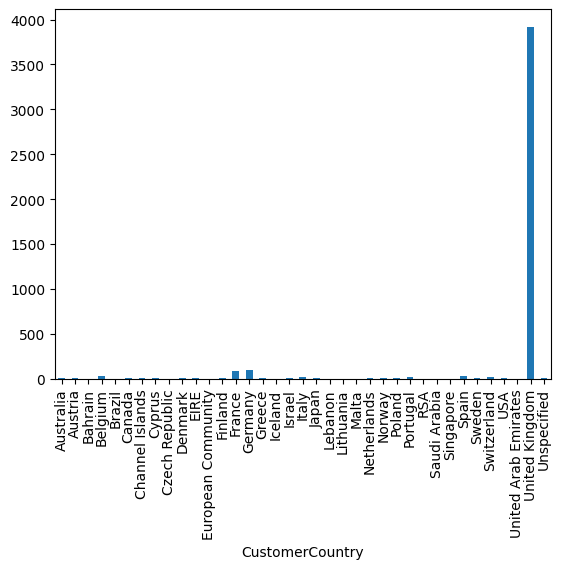

In [24]:
cc_counts = basketdf.groupby(['CustomerCountry', 'CustomerID']).size().groupby(level=0).size()
cc_counts.plot.bar()

Majority customers are from UK

## *To find out best and worst seller*

In [25]:
pid_counts = basketdf['ProdID'].value_counts()

In [26]:
best_seller_id = pid_counts.index[0]
best_seller_descr = basketdf.loc[basketdf['ProdID'] == best_seller_id]['ProdDescr'].iloc[0]
print("Best seller: {} ({})".format(str(best_seller_id), str(best_seller_descr)))

Best seller: 85123A (WHITE HANGING HEART T-LIGHT HOLDER)


In [27]:
worst_seller_id = pid_counts.index[-1]
worst_seller_descr = basketdf.loc[basketdf['ProdID'] == worst_seller_id]['ProdDescr'].iloc[0]
print("Worst seller: {} ({})".format(str(worst_seller_id), str(worst_seller_descr)))

Worst seller: 23843 (PAPER CRAFT , LITTLE BIRDIE)


## *Correlation*

To calculate pairwise correlation, we transformed some attributes into categorical ones. 

In [28]:
basketdf_corr = basketdf.copy()
basketdf_corr=basketdf_corr.drop(['ProdDescr'],axis=1)
basketdf_corr['BasketID'] = basketdf_corr['BasketID'].astype('category').cat.codes
basketdf_corr['BasketDate'] = basketdf_corr['BasketDate'].astype('category').cat.codes
basketdf_corr['CustomerID'] = basketdf_corr['CustomerID'].astype('category').cat.codes
basketdf_corr['CustomerCountry'] = basketdf_corr['CustomerCountry'].astype('category').cat.codes

In [29]:
basketdf_corr.tail()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,Qta,Amount
541905,18531,17281,2.10,271,13,22899,6,12.60
541906,18531,17281,4.15,271,13,23254,4,16.60
541907,18531,17281,4.15,271,13,23255,4,16.60
541908,18531,17281,4.95,271,13,22138,3,14.85
541909,18531,17281,18.00,271,13,POST,1,18.00


C:\Users\Manjusha\AppData\Local\Temp\ipykernel_15644\1529497195.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = basketdf_corr.corr()
C:\Users\Manjusha\AppData\Local\Temp\ipykernel_15644\1529497195.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot: >

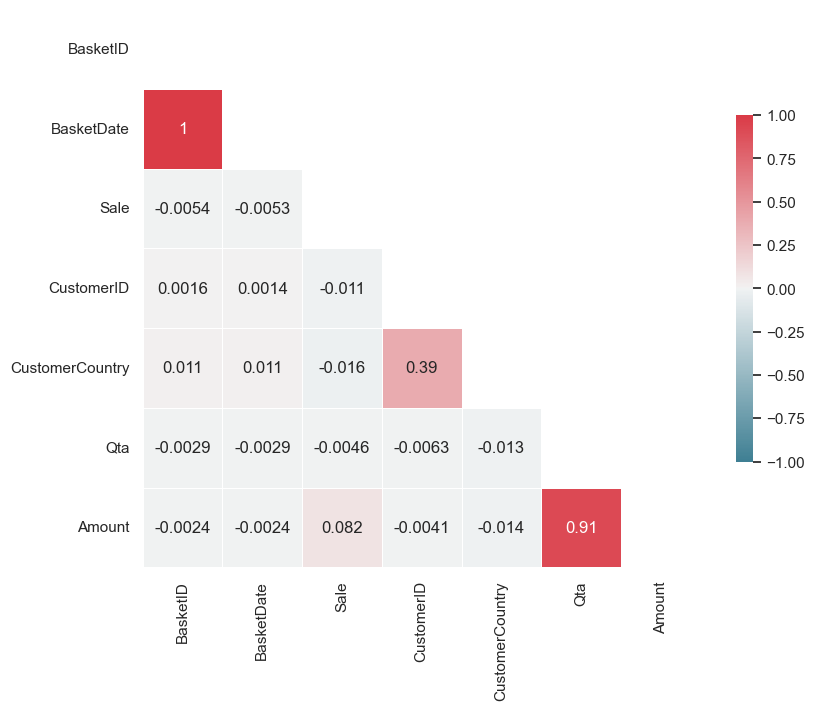

In [30]:
import seaborn as sns

correlation = basketdf_corr.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = py.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap,annot=True, vmax=1,vmin=-1,
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [31]:
basketdf_customer = basketdf.groupby('CustomerID').agg(
    I=('ProdID','count'),
    Iu=('ProdID', 'nunique'))

basketdf_customer['Imax'] = basketdf.groupby(['CustomerID','BasketID']).count().max(level=0)['BasketDate']

C:\Users\Manjusha\AppData\Local\Temp\ipykernel_15644\2902670570.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  basketdf_customer['Imax'] = basketdf.groupby(['CustomerID','BasketID']).count().max(level=0)['BasketDate']


In [32]:
basketdf_customer.head()

,I,Iu,Imax
CustomerID,,,
12346.0,1,1,1
12347.0,182,103,47
12348.0,31,22,17
12349.0,73,73,73
12350.0,17,17,17


In [33]:
pos_amounts = basketdf[basketdf['Amount'] >= 0].copy()
p_sum = pos_amounts.groupby('CustomerID')['Amount'].transform('sum')
probs = pos_amounts['Amount']/p_sum
pos_amounts['Entropy'] = -(probs * np.log(probs)) #ss.entropy(probs)
basketdf_customer['Entropy'] = pos_amounts.groupby('CustomerID')['Entropy'].sum()

In [35]:
basketdf_customer.head()

,I,Iu,Imax,Entropy
CustomerID,,,,
12346.0,1,1,1,0.000000
12347.0,182,103,47,4.943568
12348.0,31,22,17,3.163994
12349.0,73,73,73,3.897416
12350.0,17,17,17,2.772224


In [34]:
# number of baskets per customer
basketdf_customer['BasketNum'] =basketdf.groupby(['CustomerID', 'BasketID']).size().groupby(level=0).size()

In [35]:
basketdf_group = basketdf.groupby(['CustomerID','BasketID']).agg(BasketSum=('Amount', 'sum'))
basketdf_group = basketdf_group.groupby('CustomerID').agg(BasketMean=('BasketSum', 'mean'), SumExp=('BasketSum', 'sum'))
basketdf_customer['SumExp'] = basketdf_group['SumExp']
basketdf_customer['AvgExp'] = basketdf_group['BasketMean']

In [36]:
basketdf_customer.describe()


,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,91.720839,61.501153,32.086445,3.432994,4.272015,2054.270609,419.167327
std,228.785054,85.366768,31.243562,1.287378,7.697998,8989.229895,1796.537828
min,1.000000,1.000000,1.000000,0.000000,1.000000,3.750000,3.450000
25%,17.000000,16.000000,13.000000,2.612131,1.000000,307.415000,178.625000
50%,41.000000,35.000000,23.000000,3.478995,2.000000,674.485000,293.900000
75%,100.000000,77.000000,42.000000,4.327716,5.000000,1661.740000,430.113750
max,7847.000000,1787.000000,542.000000,8.335226,209.000000,280206.020000,84236.250000


<AxesSubplot: >

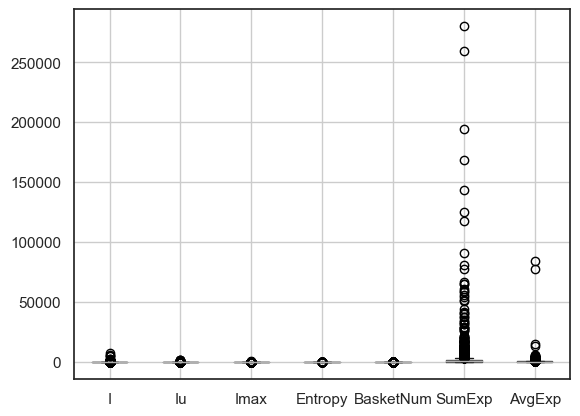

In [37]:
basketdf_customer.boxplot()


In [38]:
# use z-score to remove outliers
from scipy.stats import zscore
z_scores = zscore(basketdf_customer)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_basketdf = basketdf_customer[filtered_entries]

new_basketdf.to_csv(r'new_df.csv', index=True, header=True)

new_basketdf.describe()

,I,Iu,Imax,Entropy,BasketNum,SumExp,AvgExp
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,70.315032,52.372812,28.871014,3.350154,3.579238,1327.559716,354.999266
std,86.624853,53.545089,22.914839,1.222166,3.794688,2058.227242,329.019302
min,1.000000,1.000000,1.000000,0.000000,1.000000,3.750000,3.450000
25%,16.000000,15.000000,12.000000,2.577585,1.000000,300.935000,176.802500
50%,39.000000,33.000000,23.000000,3.411811,2.000000,640.760000,287.035000
75%,90.000000,71.000000,39.000000,4.220842,4.000000,1521.170000,417.920000
max,756.000000,315.000000,125.000000,6.334695,27.000000,28754.110000,4932.130000


C:\Users\Manjusha\AppData\Local\Temp\ipykernel_26960\3138933740.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


<AxesSubplot: >

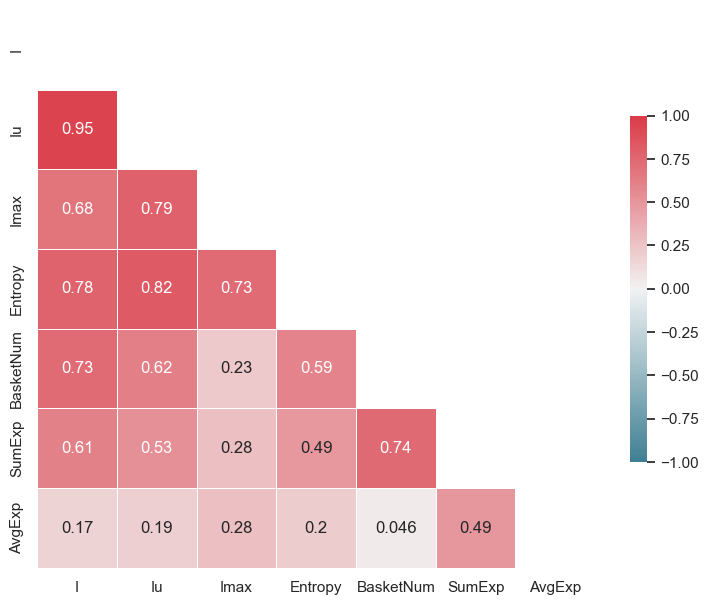

In [42]:
correlation = new_basketdf.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fnew, axnew = py.subplots(figsize=(9,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap,annot=True, vmax=1,vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})